# Metehan Ayhan - Advertising Project

Bu projenin amacı TV, Radyo ve Gazeteye ayrı ayrı ne kadar yatırım yaparsam satış rakamlarım ne kadar artar sorusuna cevap aramaktır. Bunun için multiple linear regression modeli geliştirilecektir.

### Import Packet

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
pd.set_option("display.max_columns",55)

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [9]:
df=pd.read_csv('advertising.csv')

### EDA - Exploratory Data Analysis

In [12]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [19]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Boş veri yok ve hepsi float

In [22]:
df.shape

(200, 4)

In [24]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='Radio', ylabel='Density'>

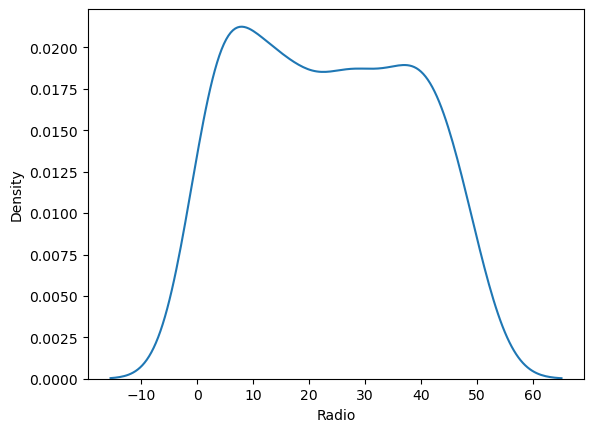

In [32]:
sns.kdeplot(x=df['Radio'])

<Axes: xlabel='TV', ylabel='Density'>

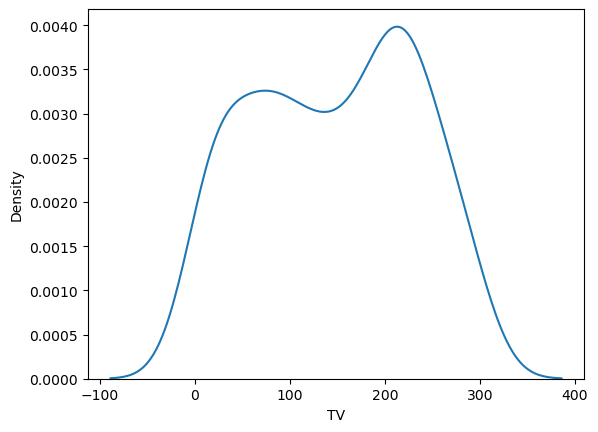

In [34]:
sns.kdeplot(x=df['TV'])

Outlier bulunmuyor..

### Modelling

In [38]:
x=df.drop('Sales',axis=1)
y=df[['Sales']]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [51]:
lr=LinearRegression()

In [53]:
model=lr.fit(x_train,y_train)

In [55]:
tahmin= model.predict(x_test)

In [59]:
r2_score(y_test,tahmin)

0.8994380241009121

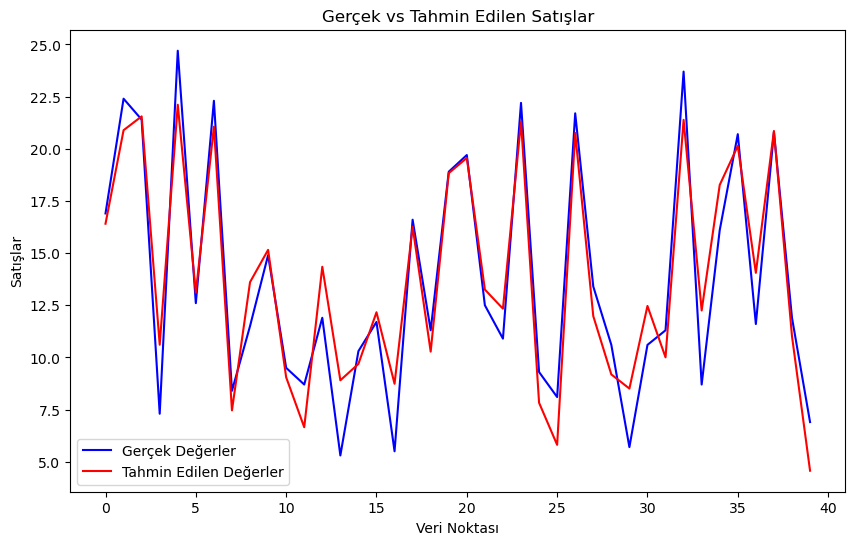

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Gerçek Değerler', color='blue')
plt.plot(tahmin, label='Tahmin Edilen Değerler', color='red')
plt.title('Gerçek vs Tahmin Edilen Satışlar')
plt.xlabel('Veri Noktası')
plt.ylabel('Satışlar')
plt.legend()
plt.show()

In [69]:
coefficients = pd.DataFrame(model.coef_.reshape(-1, len(x.columns)), columns=x.columns)
coefficients

,TV,Radio,Newspaper
0,0.04473,0.189195,0.002761


### Result

Bu çıktılar, radyo reklamlarına bütçemizin yaklaşık %80'ini ayırmamız gerektiğini, TV'ye yaklaşık %19 ayırmamız gerektiğini ve gazete reklamlarına ise %1 gibi çok az bir kısmını ayırmamız gerektiğini gösterir.